# Calculating temporal variance with and without seasonal cycle

In [1]:
using CABLAB
using ImageMagick

INFO: Precompiling module CABLAB.


A Cube is defined via its path and some a single variable is read into memory.

In [2]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/")
cdata         = getCubeData(c,variable="soil_moisture",latitude=(35,65), longitude=(-15,40));

Here we demonstrate how to add a user-defined function to use the DAT's capabilities. First we define the function that has the signature *xin* (input data), *xout* (output data), *maskin* (input mask), *maskout* (output mask). In this case it simply cacluates the variance of a time series. Then we call registerDATFunction, makes the function simply callable thourgh mapCube. 

In [3]:
function varianceTime{T}(xout::AbstractArray{T,0},maskout::AbstractArray{UInt8,0},xin::AbstractVector{T},maskin::AbstractVector)
  s=0.0
  s2=0.0
  n=0
  for i in eachindex(xin)
    if maskin[i]==CABLAB.VALID
      s+=xin[i]
      s2+=xin[i]*xin[i]
      n+=1
    end
  end
  if n>0
    xout[1]=s2/n-(s/n)*(s/n)
    maskout[1]=CABLAB.VALID
  else
    maskout[1]=CABLAB.MISSING
  end
end

CABLAB.DAT.registerDATFunction(varianceTime,(TimeAxis,),());

Here we call the function with our 3D data cube as its argument.

In [4]:
v1             = mapCube(varianceTime,cdata);
cube_anomalies = mapCube(removeMSC,cdata);
v2             = mapCube(varianceTime,cube_anomalies);

We get the spatial mean of the time variances

And show the maps of variances:

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 0.0 
 0.005 
 0.01 
 0.015 
 0.02
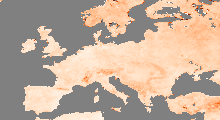

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 0.0 
 0.005 
 0.01 
 0.015 
 0.02
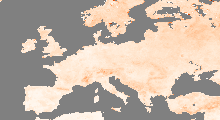

In [5]:
display(plotMAP(v1,dmin=0,dmax=0.02))
display(plotMAP(v2,dmin=0,dmax=0.02))

In [6]:
mv1=mapCube(spatialMean,(v1,v1.axes[2]))
mv2=mapCube(spatialMean,(v2,v2.axes[2]))
println("Mean variance with seasonal cycle: ", mv1.data[1])
println("Mean variance without seasonal cycle: ", mv2.data[1])

LoadError: LoadError: MethodError: no method matching getInAxes(::Void, ::Tuple{CABLAB.Cubes.CubeMem{Float32,2},CABLAB.Cubes.Axes.LatAxis})
Closest candidates are:
  getInAxes(!Matched::Tuple{Vararg{DataType,N}}, ::Any) at /Net/Groups/BGI/people/fgans/julia_alt_packages/v0.5/CABLAB/src/DAT/DAT.jl:103
  getInAxes(!Matched::Tuple{Vararg{Tuple{Vararg{DataType,N}},N}}, ::Tuple) at /Net/Groups/BGI/people/fgans/julia_alt_packages/v0.5/CABLAB/src/DAT/DAT.jl:106
while loading In[6], in expression starting on line 1

In [9]:
using NullableArrayStats
v=reduceCube(mean,v1,(LonAxis,LatAxis));

LoadError: LoadError: ArgumentError: Module NullableArrayStats not found in current path.
Run `Pkg.add("NullableArrayStats")` to install the NullableArrayStats package.
while loading In[9], in expression starting on line 1

In [10]:
Pkg.clone("git@github.com:JuliaStats/NullableStats.jl")

INFO: Cloning NullableStats from git@github.com:JuliaStats/NullableStats.jl
INFO: Computing changes...
INFO: No packages to install, update or remove


In [11]:
using NullableStats

LoadError: LoadError: LoadError: LoadError: UndefVarError: varzm not defined
while loading /Net/Groups/BGI/people/fgans/julia_alt_packages/v0.5/NullableStats/src/statistics.jl, in expression starting on line 59
while loading /Net/Groups/BGI/people/fgans/julia_alt_packages/v0.5/NullableStats/src/NullableStats.jl, in expression starting on line 6
while loading In[11], in expression starting on line 1